In [19]:
from google.colab import drive
import zipfile
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Diretório onde o dataset será salvo após extração
output_dir = "/content/animal_pose_dataset"
zip_path = "/content/drive/MyDrive/animal_pose_dataset/Copy of images.zip"

# Verificar se o arquivo ZIP existe
if not os.path.exists(zip_path):
    raise Exception(f"Arquivo ZIP não encontrado no caminho: {zip_path}")

# Extrair o conteúdo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("Extração concluída.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extração concluída.


In [20]:
# Listar arquivos e diretórios no diretório de saída
image_files = []
for root, dirs, files in os.walk(output_dir):
    for name in files:
        if name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, name))

print(f"Total de imagens encontradas: {len(image_files)}")


Total de imagens encontradas: 4608


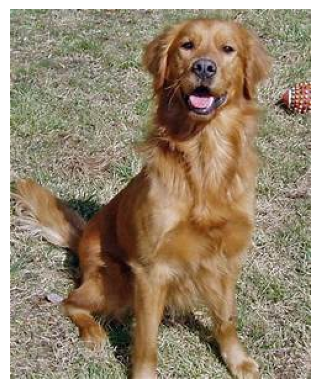

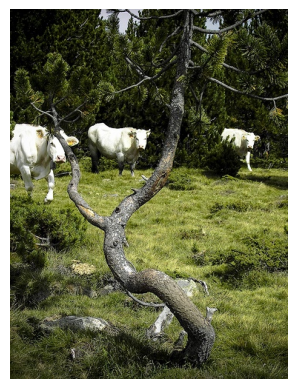

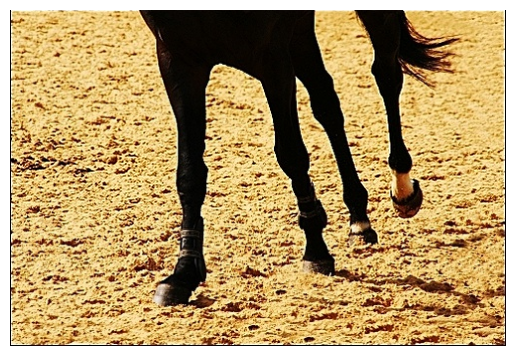

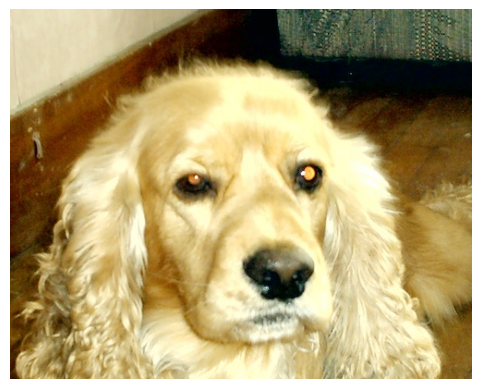

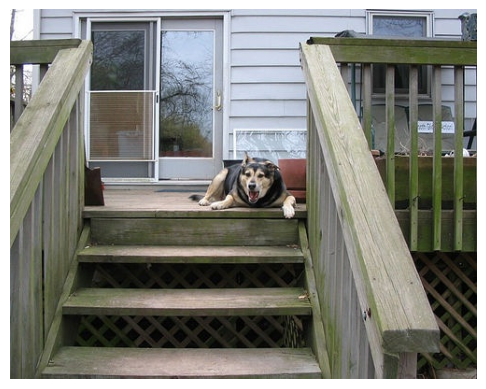

In [21]:
import matplotlib.pyplot as plt
import cv2

# Função para mostrar uma imagem
def show_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Mostrar as primeiras 5 imagens
for image_path in image_files[:5]:
    show_image(image_path)


In [22]:
# Suponha que você tem uma lista de caminhos de imagens de bovinos manualmente identificada
bovino_image_files = [
    # Adicione aqui os caminhos das imagens de bovinos identificados
]

print(f"Total de imagens de bovinos identificadas: {len(bovino_image_files)}")


Total de imagens de bovinos identificadas: 0


In [23]:
import cv2

# Diretório para salvar imagens de bovinos processadas
bovino_images_dir = os.path.join(output_dir, "bovino_images")
os.makedirs(bovino_images_dir, exist_ok=True)

# Função para processar imagens
def process_image(image_path, output_size=(256, 256)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, output_size)
    normalized_image = resized_image / 255.0
    return normalized_image

# Processar e salvar imagens de bovinos
for image_path in bovino_image_files:
    processed_image = process_image(image_path)
    output_image_path = os.path.join(bovino_images_dir, os.path.basename(image_path))
    cv2.imwrite(output_image_path, (processed_image * 255).astype('uint8'))

print("Processamento de imagens de bovinos concluído.")


Processamento de imagens de bovinos concluído.


In [24]:
import pandas as pd

# Tabela de resumo das imagens processadas
summary_data = {
    "Total de Imagens": [len(bovino_image_files)],
    "Tamanho das Imagens (pós-processamento)": ["256x256"]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)


   Total de Imagens Tamanho das Imagens (pós-processamento)
0                 0                                 256x256
